# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras  # intalled keras
import keras           # import keras

# Importing keras model and dependencies

In [0]:
import numpy as np                         # import numpy for numerical calculation

from keras.models import Sequential        # import keras` Sequential model which is a linear stack of layers.
from keras.layers import Flatten           # from keras` layere we import "Flatten" which convert multi-dimension array to one dimension 
from keras.layers import Convolution2D     # from keras` layere we import "Convolution2D" convolution class
from keras.utils import np_utils           # from keras.utils import np_utils which is a separate package (and a keras dependency - which doesn't get install with it)

from keras.datasets import mnist           # from keras.datasets, importing mnist dataset

### Loading mnist datasets and splitting train and test datateset tupel

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # Load mnist and make  tuple pair of train and test

(60000, 28, 28)


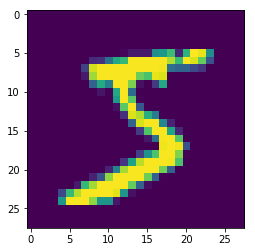

In [21]:
print (X_train.shape)                      # printing dimension of X_train. Total 60k of 2-Dimension 28x28 image
from matplotlib import pyplot as plt       # import pyplot as plt from matplotlib, used for plotting
%matplotlib inline                         # matplotlib magic command to show static plot right below our code
plt.imshow(X_train[0])                     # display first image in our training data

### Reshaping image because The Convolution2D layers in Keras are designed to work with 3 dimensions per example

mnist.load_data() supplies the MNIST digits with structure (nb_samples, 28, 28) i.e. with 2 dimensions per example representing a greyscale image 28x28.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)  # reshaping 28x28x1 dimensions for all 60k images
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)     # reshaping 28x28x1 dimensions for all 10k images

### Change numpy array data types and Scaled
Currently it has "uint8" i.e. Unsigned integer (0 to 255). 

**Scaled ?** Since we used Gradient Descent, for faster convergence we required number to be scaled. 

In [0]:
X_train = X_train.astype('float32')  # changed array’s data-type to float32
X_test = X_test.astype('float32')    # same as above
X_train /= 255                       # scale the pixel intensities down to the 0-1 range by dividing them by 255 which is the max value           
X_test /= 255                        # same scale as above

### One-hot vector labels of target variable
10 uniques target values , i.e. 0,1,2,3,4,5,6,7,8 and 9 digits

In [44]:
y_train[:10]                        # checking first 10 digits label (target variable)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]  # the first 10 class` array, compare the position of 1 (count starts from 0) in below and our y_train[:10] values. These two are same!!


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Creating the Model Using the Sequential API

-  importing "Activation" (for defining activation function) and MaxPooling2D (To downsample feature maps)
- Adding layers

For the below model, ***Please** find details below. Also we add for bias term in calculation of parameters in this case.


|layers | Receptive field | input channel dimensions| #parameters |	Total image in memory|
| :------------ | :-------------- | :----- |:------------ | :----- |
| model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) | 	3	| 28x28x1	| 320	| 32| 
| model.add(Convolution2D(64, 3, 3, activation='relu'))| 	5	| 26x26x32	| 18496| 	64| 
| model.add(Convolution2D(128, 3, 3, activation='relu'))| 	7	| 24x24x64| 	73856	| 128| 
|model.add(MaxPooling2D(pool_size=(2, 2))) |9	|22x22x128
|model.add(Convolution2D(256, 3, 3, activation='relu'))	|18	|11x11x128	|295168|	256|
|model.add(Convolution2D(512, 3, 3, activation='relu'))	|20	|9x9x256| 1180160	|512|
|model.add(Convolution2D(1024, 3, 3, activation='relu'))|	22	|7x7x512|	4719616|	1024 |
|model.add(Convolution2D(2048, 3, 3, activation='relu'))| 	24	| 5x5x1024 |	18876416	| 2048 |
|model.add(Convolution2D(10, 3, 3, activation='relu'))	|26	|   3x3x2048 |	184330 |	10 |
|model.add(Flatten())		| |1x1x10	| 
|model.add(Activation('softmax'))		| |10	




In [0]:
from keras.layers import Activation, MaxPooling2D                               # importing "Activation" MaxPooling2D 

model = Sequential()                                                            # initiate keras` Sequential model 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))    # convet layer with Relu actiavation function
model.add(Convolution2D(64, 3, 3, activation='relu'))                           
model.add(Convolution2D(128, 3, 3, activation='relu'))                          

model.add(MaxPooling2D(pool_size=(2, 2)))                                       # MaxPooling layer with 2x2

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())                                                            # Flatten previous layers n-dimension array (1x1x10)
model.add(Activation('softmax'))                                                # Apply softmax function

model.summary()                                                                 # print model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

# Configures the model for training.

-  loss as 'categorical_crossentropy' since we are dealing with multi-class classification
- "adam" - Adaptive Moment Estimation  one of the common/best gradient-based optimizer
- "accuracy" as the model metrics

In [0]:
# configure model with above parameters

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Fit the model on Training set

- batch_size=32  : sends 32 image in batch-wise and train model (feed-forward and backpropagation)
- 10 number of epoch : One epoch is when an entire dataset is passed both forward and backward through the neural network only once.
- verbose as 1 : show progress bar of the training with details 

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)  # fit model with above notes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 2.3027 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - a

# Model evaluation

Please note that predict is a part of model evaluation. Only after we predict, one can used prediction value to evalute our metrics, say "accuracy"

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)  # Use trained model and predict on test set , then finally score metrics. We have given "accuracy" as our metrics

In [0]:
print(score)  # our loss` value and accuracy. Just 9.8% accuracy. Opps!!! okay its just 10 epoch but almost all accuracy values are same!

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test) # used trained model to predict class

In [0]:
print(y_pred[:9]) # first 9 prediction
print(y_test[:9]) # actual 9 targel class

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


# What is wrong with the network ?

-  In general, MaxPooling should be applied at receptive field of 11x11

-  Dataset is not complex , meaning digits from 0 to 9 does not need too many features (ingredients) yet we tend to generate a whooping 4074 (32+64	+128	+ 256 + 	512	+ 1024	+ 2048	+10 ) channels. Please note there is exponential increase in the  channels in successive layers and suddenly shrink to 10 channels . This is is problematic as we loose important signal during the shrinkage. Model accuracy`s concern here.

- Batch size of 32 out of 60k training images seems to be small. It would affect long term memory of the network

- We have whooping 4074 images in our memory just for a single image training. So for a batch size of 32, we have 32x4074 images in memory which makes training slower.

-   25.3M parameters (25,348,362 ) which contribute to slow training.
